# Basic Probability

## Random Experiments

### Sampling With and Without Replacement

In [24]:
# Listing 2.4: Fishing with and without replacement
using StatsBase, Plots ; pyplot()

Plots.PyPlotBackend()

In [25]:
function proportionFished(gF, sF, n, N, withReplacement = false)
    function fishing()
        fishInPond = [ones(Int64, gF); zeros(Int64, sF)]
        fishCaught = Int64[]

        for fish in 1:n
            fished = rand(fishInPond)
            push!(fishCaught, fished)
            if withReplacement == false
                deleteat!(fishInPond, findfirst(x->x==fished, fishInPond))
            end
        end
        sum(fishCaught)
    end

    simulations = [fishing() for _ in 1:N]
    proportions = counts(simulations, 0:n)/N
    
    if withReplacement
        plot!(0:n, proportions,
            line=:stem, marker=:circle, c=:blue, ms=6, msw=0,
            label="With replacement",
            xlabel="n",
            ylims=(0, 0.6), ylabel="Probability")
    else
        plot!(0:n, proportions,
            line=:stem, marker=:xcross, c=:red, ms=6, msw=0,
            label="Without replacement")
    end
end

proportionFished (generic function with 2 methods)

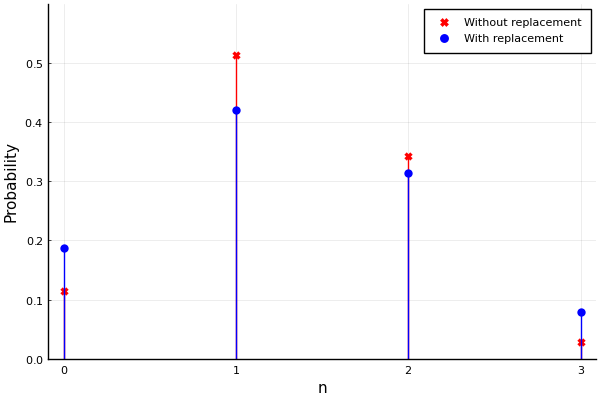

In [26]:
N = 10^6
goldFish, silverFish, n = 3, 4, 3
proportionFished(goldFish, silverFish, n, 3)
plot()
proportionFished(goldFish, silverFish, n, N)
proportionFished(goldFish, silverFish, n, N, true)

### Lattice paths

In [27]:
# Listing 2.5: Lattice paths
using Random, Combinatorics, Plots, LaTeXStrings; pyplot()
Random.seed!(12)

MersenneTwister(UInt32[0x0000000c], Random.DSFMT.DSFMT_state(Int32[589013436, 1072892337, 1395473285, 1073017187, -346481041, 1072887813, 23263411, 1072776800, -1379277159, 1073038715  …  -173461052, 1072708370, 859747322, 1072998707, -624312252, -2047062377, 1852138555, -1338826024, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000

In [28]:
n, N = 5, 10^5

(5, 100000)

In [29]:
function isUpperLattice(v)
    for i in 1:Int(length(v)/2)
        sum(v[1:2*i-1]) >= i ? continue : return false
    end
    return true
end

isUpperLattice (generic function with 1 method)

In [30]:
omega = unique(permutations([zeros(Int, n);ones(Int, n)]))
A = omega[isUpperLattice.(omega)]
pA_modelI = length(A)/length(omega)

0.16666666666666666

In [31]:
function randomWalkPath(n)
    x, y = 0, 0
    path = []
    while x<n && y<n
        if rand() < 0.5
            x += 1
            push!(path,0)
        else
            y += 1
            push!(path,1)
        end
    end
    append!(path, x<n ? zeros(Int64,n-x) : ones(Int64,n-y))
    return path
end

randomWalkPath (generic function with 1 method)

In [32]:
pA_modelIIest = sum([isUpperLattice(randomWalkPath(n)) for _ in 1:N]) / n

4899.4

In [33]:
println("Model I: ",pA_modelI, "\t Model II: ", pA_modelIIest)

Model I: 0.16666666666666666	 Model II: 4899.4


In [34]:
function plotPath(v, l, c)
    x, y = 0, 0
    graphX, graphY = [x], [y]
    for i in v
        if i == 0
            x += 1
        else
            y += 1
        end
        push!(graphX, x), push!(graphY,y)
    end
    plot!(graphX, graphY,
        la=0.8, lw=2, label=l, c=c, ratio=:equal, legend=:topleft,
        xlims=(0,n), ylims=(0,n),
        xlabel=L"East\rightarrow", ylabel=L"North\rightarrow")
end     

plotPath (generic function with 1 method)

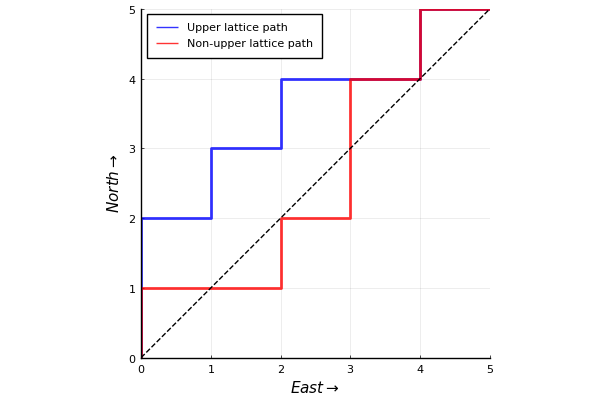

In [35]:
plot()
plotPath(rand(A), "Upper lattice path", :blue)
plotPath(rand(setdiff(omega,A)), "Non-upper lattice path", :red)
plot!([0, n], [0,n], ls=:dash, c=:black, label="")

## Working With Sets

### Representing Sets in Julia

In [38]:
# Listing 2.6: Basic set operations
A = Set([2,7,2,3])
B = Set(1:6)
omega = Set(1:10)

Set{Int64} with 10 elements:
  7
  4
  9
  10
  2
  3
  5
  8
  6
  1

In [41]:
AunionB = union(A, B)
AintersectionB = intersect(A, B)
BdifferenceA = setdiff(B, A)
Bcomplement = setdiff(omega, B)
AsymDifferenceB = union(setdiff(A,B),setdiff(B,A))

Set{Int64} with 5 elements:
  7
  4
  5
  6
  1

In [42]:
println("A = $A, B = $B")
println("A union B = $AunionB")
println("A intersection B = $AintersectionB")
println("B diff A = $BdifferenceA")
println("B complement = $Bcomplement")
println("A symDifference B = $AsymDifferenceB")
println("The element '6' is an element of A: $(in(6,A))")
println("Symmetric difference and intersection are subsets of the union: ",
        issubset(AsymDifferenceB,AunionB),", ", issubset(AintersectionB,AunionB))

A = Set([7, 2, 3]), B = Set([4, 2, 3, 5, 6, 1])
A union B = Set([7, 4, 2, 3, 5, 6, 1])
A intersection B = Set([2, 3])
B diff A = Set([4, 5, 6, 1])
B complement = Set([7, 9, 10, 8])
A symDifference B = Set([7, 4, 5, 6, 1])
The element '6' is an element of A: false
Symmetric difference and intersection are subsets of the union: true, true


### The Probability of a Union

In [44]:
# Listing 2.7: An innocent mistake with Monte Carlo
using Random, StatsBase
Random.seed!(1)

MersenneTwister(UInt32[0x00000001], Random.DSFMT.DSFMT_state(Int32[1749029653, 1072851681, 1610647787, 1072862326, 1841712345, 1073426746, -198061126, 1073322060, -156153802, 1073567984  …  1977574422, 1073209915, 278919868, 1072835605, 1290372147, 18858467, 1815133874, -1716870370, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x000000000000

In [46]:
A = Set(['a', 'e', 'i', 'o', 'u'])
B = Set(['x','y','z'])
omega = 'a':'z'

'a':1:'z'

In [47]:
N = 10^6

1000000

In [49]:
println("mcEst1 \t \tmcEst2")
for _ in 1:5
    mcEst1 = sum([in(sample(omega), A) || in(sample(omega), B) for _ in 1:N]) / N # 2 samples => wrong
    mcEst2 = sum([in(sample(omega), union(A,B)) for _ in 1:N]) / N
    println(mcEst1,"\t",mcEst2)
end

mcEst1 	 	mcEst2
0.285989	0.307454
0.285156	0.307374
0.285396	0.306971
0.285263	0.307478
0.286037	0.307811


### Secretary with Envelopes

In [21]:
# Listing 2.8: Secretary with envelopes
using Random, StatsBase, Combinatorics
Random.seed!(1)

MersenneTwister(UInt32[0x00000001], Random.DSFMT.DSFMT_state(Int32[1749029653, 1072851681, 1610647787, 1072862326, 1841712345, 1073426746, -198061126, 1073322060, -156153802, 1073567984  …  1977574422, 1073209915, 278919868, 1072835605, 1290372147, 18858467, 1815133874, -1716870370, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x000000000000

In [22]:
function bruteSetsProbabilityAllMiss(n)
    omega = collect(permutations(1:n))
    matchEvents = []
    for i in 1:n
        event = []
        for p in omega
            if p[i] == i
                push!(event,p)
            end
        end
        push!(matchEvents,event)
    end
    noMatch = setdiff(omega, union(matchEvents...))
    return length(noMatch)/length(omega)
end

bruteSetsProbabilityAllMiss (generic function with 1 method)

In [23]:
formulaCalcAllMiss(n) = sum([(-1)^k/factorial(k) for k in 0:n])

formulaCalcAllMiss (generic function with 1 method)

In [24]:
function mcAllMiss(n, N)
    function envelopeStuffer()
        envelopes = Random.shuffle!(collect(1:n))
        return sum(envelopes[i] == i for i in 1:n) == 0
    end
    data = [envelopeStuffer() for _ in 1:N]
    return sum(data)/N
end

mcAllMiss (generic function with 1 method)

In [25]:
N = 10^6

1000000

In [26]:
println("n\tBrute Force\tFormula\t\tMonte Carlo\tAsymptotic",)
for n in 1:6
    bruteForce = bruteSetsProbabilityAllMiss(n)
    fromFormula = formulaCalcAllMiss(n)
    fromMC = mcAllMiss(n,N)
    println(n,"\t",round(bruteForce,digits=4),"\t\t",round(fromFormula,digits=4),
        "\t\t",round(fromMC,digits=4),"\t\t",round(1/MathConstants.e,digits=4))
end

n	Brute Force	Formula		Monte Carlo	Asymptotic
1	0.0		0.0		0.0		0.3679
2	0.5		0.5		0.4994		0.3679
3	0.3333		0.3333		0.3337		0.3679
4	0.375		0.375		0.3747		0.3679
5	0.3667		0.3667		0.3665		0.3679
6	0.3681		0.3681		0.3678		0.3679


### An Occupancy Problem

In [27]:
using Plots; pyplot()

Plots.PyPlotBackend()

In [28]:
occupancyAnalytic(n,r) = sum([(-1)^k*binomial(n,k)*(1-k/n)^r for k in 0:n])

occupancyAnalytic (generic function with 1 method)

In [29]:
function occupanyMC(n, r, N)
    fullCount = 0
    for _ in 1:N
        envelopes = zeros(Int, n)
        for k in 1:r
            target = rand(1:n)
            envelopes[target] += 1
        end
        numFilled = sum(envelopes .> 0)
        if numFilled == n
            fullCount +=1
        end
    end
    return fullCount/N
end

occupanyMC (generic function with 1 method)

In [30]:
max_n, N, Kvals = 100, 10^3, [2,3,4]

(100, 1000, [2, 3, 4])

In [31]:
analytic = [[occupancyAnalytic(big(n), big(k*n)) for n in 1:max_n] for k in Kvals]

3-element Array{Array{BigFloat,1},1}:
 [1.0, 0.875, 0.7407407407407407407407407407407407407407407407407407407407407407407407407407507, 0.6229248046875, 0.5225471999999999999999999999999999999999999999999999999999999999999999999999951, 0.4378156806211790208132229165608223678639773747226879371369540551067757286321699, 0.3665749237277169623553713297448685748139906688148201513501706581631966528255032, 0.30679788173756605829112231731414794921875, 0.2566975664075897743720600625259512738119349301793832033205371817029714338983751, 0.2147373231974006400000000000000000000000000000000000000000000000000000000001176  …  1.069657334526848513060724413172337700899371866204013344464186587033996001303631e-07, 8.941398126513886825738219454513648957514481632012323087638438017198550960585833e-08, 7.474224150732878615287973980617874647757151383973183924654413320436969764181841e-08, 6.24779443278709531559446203760038434553284555234278644256711434180745164111931e-08, 5.2226061526848121582031958416321831104276

In [32]:
monteCarlo = [[occupanyMC(n,k*n,N) for n in 1:max_n] for k in Kvals]

3-element Array{Array{Float64,1},1}:
 [1.0, 0.872, 0.731, 0.597, 0.49, 0.449, 0.369, 0.296, 0.268, 0.246  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [1.0, 0.965, 0.922, 0.884, 0.826, 0.784, 0.755, 0.703, 0.668, 0.644  …  0.006, 0.013, 0.006, 0.006, 0.002, 0.01, 0.007, 0.008, 0.006, 0.002]
 [1.0, 0.989, 0.979, 0.954, 0.951, 0.921, 0.921, 0.865, 0.866, 0.859  …  0.175, 0.166, 0.163, 0.168, 0.145, 0.164, 0.174, 0.151, 0.158, 0.159]

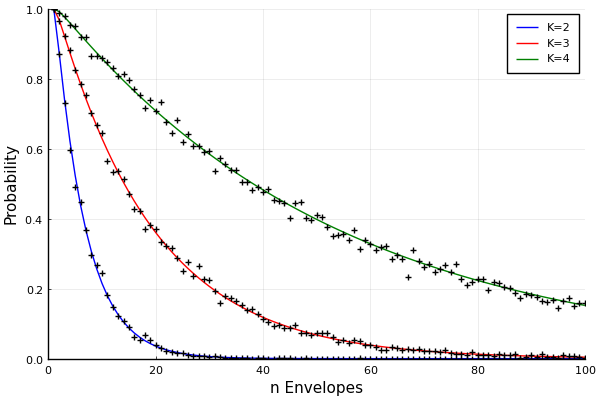

In [33]:
plot(1:max_n, analytic, c=[:blue :red :green],
    label=["K=2" "K=3" "K=4"])
scatter!(1:max_n, monteCarlo, mc=:black, shape=:+,
    label="", xlims=(0,max_n),ylims=(0,1),
    xlabel="n Envelopes", ylabel="Probability", legend=:topright)